# Hello!
### This project takes YouTube videos and displays the clusters of comments. This is done by taking the video's comments and running them through a k-means clustering algorithm. The clusters are then displayed in a graph, with each cluster being a different color.

In [1]:
import pandas as pd
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# First, we will import our needed libraries. Pandas is for data manipulation, time is for timing our code, and selenium is for web scraping.
### We will also be using the Chrome web driver, which allows us to control a Chrome browser from Python.

In [2]:
data=[]
def commentscrap(url):
    with Chrome() as driver:
        wait = WebDriverWait(driver,10) #selenium will wait for a max of 10 seconds
        driver.get(url) #accessing the URL you want with the driver.get function

        for item in range(10): #higher range = more content
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) #scrolling down and wait until everything is visible with wait.until and EC.visibility_of_element_located.
            time.sleep(5)

        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text"))): #locating the comments section
            print(data.append(comment.text)) #appends comments to data list

# Next, we will define our commentscrap function. This function will take in a URL and scrape the comments from that URL.
### We will use Selenium to scroll down the page and load more comments, and then we will use Pandas to store those comments in a list.

In [3]:
url='https://www.youtube.com/watch?v=q0hyYWKXF0Q' #video of choice
commentscrap(url);

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=107.0.5304.110)
Stacktrace:
0   chromedriver                        0x0000000100f552c8 chromedriver + 4752072
1   chromedriver                        0x0000000100ed5463 chromedriver + 4228195
2   chromedriver                        0x0000000100b38b18 chromedriver + 441112
3   chromedriver                        0x0000000100b15210 chromedriver + 295440
4   chromedriver                        0x0000000100b9ae3d chromedriver + 843325
5   chromedriver                        0x0000000100bae719 chromedriver + 923417
6   chromedriver                        0x0000000100b96b33 chromedriver + 826163
7   chromedriver                        0x0000000100b679fd chromedriver + 633341
8   chromedriver                        0x0000000100b69051 chromedriver + 639057
9   chromedriver                        0x0000000100f2230e chromedriver + 4543246
10  chromedriver                        0x0000000100f26a88 chromedriver + 4561544
11  chromedriver                        0x0000000100f2e6df chromedriver + 4593375
12  chromedriver                        0x0000000100f278fa chromedriver + 4565242
13  chromedriver                        0x0000000100efd2cf chromedriver + 4391631
14  chromedriver                        0x0000000100f465b8 chromedriver + 4691384
15  chromedriver                        0x0000000100f46739 chromedriver + 4691769
16  chromedriver                        0x0000000100f5c81e chromedriver + 4782110
17  libsystem_pthread.dylib             0x00007ff81e2a3259 _pthread_start + 125
18  libsystem_pthread.dylib             0x00007ff81e29ec7b thread_start + 15


# For this project, we decided to go for a video that might be deemed controversial, and one that would spew many opinions from commenters
### The video in question is "TONES AND I - DANCE MONKEY (OFFICIAL VIDEO)" uploaded by Tones And I, the music video for her chart-topping song.


In [ ]:
df = pd.DataFrame(data, columns=['comment'])
df
    

,comment
0,In Australia they play this like every ten son...
1,"Out of all of the songs ever made, this is def..."
2,"Every time I'm completely unmotivated, and hav..."
3,Gosebumps
4,Amo esse clipe.
...,...
215,que verdade tão linda
216,"Others: Dance for me, dance for me, dance for ..."
217,Soy mexicano &me fascinó la canción Genial
218,I love this


# Here, we're using Pandas to create a DataFrame from our list of comments. 
### This DataFrame will be used in our next step, which is to cluster the comments.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #used to convert text to vectors
from sklearn.decomposition import PCA
vectorizer = CountVectorizer()
x_vectorize=vectorizer.fit_transform(df.comment).toarray() #to turn the sentences to numbers
x_vectorize.shape
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_vectorize) #reducing the dimentionality to 2
df['x']=x_pca[:,0]
df['y']=x_pca[:,1]


# In this step, we will use Scikit-Learn to convert our comments into vectors. We will then use PCA to reduce the dimensionality of our vectors.
### This is done so that our data is more manageable and we can more easily visualize it. We will store the x and y coordinates of our vectors in our DataFrame.

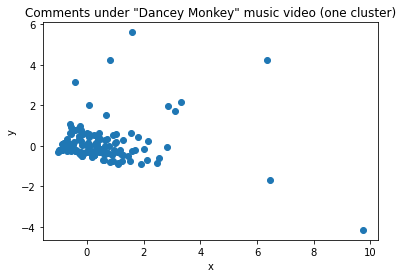

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fast')
plt.title('Comments under "Dancey Monkey" music video (one cluster)')
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_pca[:,0],x_pca[:,1]);

# Here, we are visualizing our data using Matplotlib. We can see that our data is clustered fairly well along -1 and 1 on the x-axis. 
### This shows that these comments are similar in nature, with a few outliers (those comments that are far from the cluster/dissimilar to the rest).

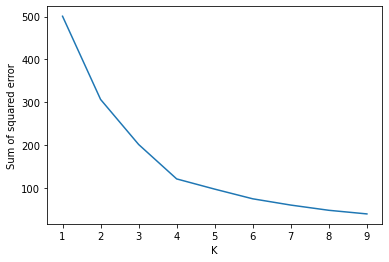

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# In this step, we are finding the optimal number of clusters using the elbow method.
### We can see that the elbow is at k=4, which means that 4 clusters is the optimal number for our data.

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['x','y']])
y_predicted

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 2, 0, 1, 0, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 3,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0],
      dtype=int32)

# Here, we are using KMeans to cluster our data. We can see that our data has been clustered into 4 groups.

In [ ]:
df['cluster']=y_predicted
df.head()

,comment,x,y,cluster
0,In Australia they play this like every ten son...,0.179155,-0.321989,3
1,"Out of all of the songs ever made, this is def...",2.461836,-0.834057,3
2,"Every time I'm completely unmotivated, and hav...",1.551140,0.622692,3
3,Gosebumps,-0.812153,-0.145384,0
4,Amo esse clipe.,-0.851636,-0.164360,0


In [ ]:
km.cluster_centers_

array([[-0.62186668, -0.01889489],
       [ 3.00800925,  3.3174979 ],
       [ 8.07961901, -2.92174663],
       [ 0.90357774, -0.17601642]])

# These are the coordinates of the center of each cluster.
### Now, we will visualize our clusters, with each cluster being a different color.


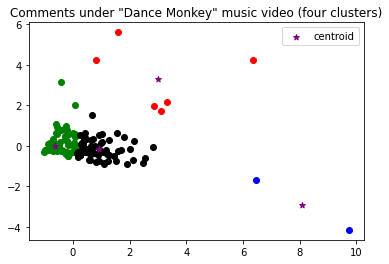

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.x,df1.y,color='green')
plt.scatter(df2.x,df2.y,color='red')
plt.scatter(df3.x,df3.y,color='blue')
plt.scatter(df4.x,df4.y,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.style.use('fast')
plt.title('Comments under "Dance Monkey" music video (four clusters)')
plt.legend();

# We can see that our data has been clustered fairly well. The clusters barely overlap with one another, and they are all fairly compact (with the exception of our red & blue cluster, which are spread thinly over the x and y axis).
### There are also a few outliers, which are points that are far from the cluster centroids (again, mainly a part of the red/blue cluster).

In [ ]:
df[df['cluster']==0]

,comment,x,y,cluster
3,Gosebumps,-0.812153,-0.145384,0
4,Amo esse clipe.,-0.851636,-0.164360,0
5,Makes me want to DANCE and sing.,-0.420112,0.791869,0
6,videos:Grandpa's \nVoice: Female \nme: confuse...,-0.796047,0.125682,0
7,Perfeita!!!.,-0.814589,-0.146543,0
...,...,...,...,...
215,que verdade tão linda,-0.858332,-0.170107,0
216,"Others: Dance for me, dance for me, dance for ...",-0.437053,3.147735,0
217,Soy mexicano &me fascinó la canción Genial,-0.839814,0.103482,0
218,I love this,-0.191918,-0.352648,0


# The above comments are in our green cluster.
### We can see that these comments are mostly neutral to positive, and include those in different languages (Portuguese, Spanish, German, etc.)

In [ ]:
df[df['cluster']==1]

,comment,x,y,cluster
26,I remember my family explaining my coma I went...,6.346924,4.243451,1
116,Man this grandpa is very funny I love this son...,2.848947,1.965143,1
139,They say oh my God I see the way you shine\nTa...,1.600010,5.601901,1
159,"Thank you, Tones and I. Thanks to this song of...",3.121624,1.691550,1
175,Lyrics:\nThey say oh my God I see the way you ...,0.829655,4.229205,1
213,great song. belive in you and thats the messag...,3.300896,2.173737,1


# The above comments are in our red cluster.
### We can see that these comments are all extremely similar, and some of them happen to repeat lyrics made in the song.

In [ ]:
df[df['cluster']==2]

,comment,x,y,cluster
55,I love music and this is definitely a song. If...,6.439517,-1.687998,2
135,I remember listening to this with my older sis...,9.719721,-4.155495,2


# The above comments are in our blue cluster.
### Each comment here seems to reminisce over a particular experience over the song, including keywords such as "remember" and mentioning stories to do with the video.

In [ ]:
df[df['cluster']==3]

,comment,x,y,cluster
0,In Australia they play this like every ten son...,0.179155,-0.321989,3
1,"Out of all of the songs ever made, this is def...",2.461836,-0.834057,3
2,"Every time I'm completely unmotivated, and hav...",1.551140,0.622692,3
8,It’s a funny thing. This played on the radio 5...,1.803985,0.434817,3
9,love this song,0.246590,-0.474708,3
...,...,...,...,...
207,Love this coz at my side it's brings memorie...,0.700411,0.336690,3
208,This music video will be my favorite for a ver...,0.304725,0.142916,3
209,This is my mine and my kids fave song,0.923500,0.546017,3
211,This is like one of the best songs Eva,0.582984,-0.714260,3


# Finally, the above comments are in our black cluster.
### We can see that these comments are all in the same language, and comments by commenters who are more inclined to share their (positive) opinion are found here as well, including words such as "love" and "best".

# We can conclude that our clustering algorithm was successful in grouping together similar comments.
### The red cluster seems to be the most uniform, while the black cluster is the most diverse (with the blue cluster coming in second). The green cluster is somewhere in the middle, being almost as uniform as the red cluster, and with much more diversity than the black cluster. The outliers in each cluster are also interesting to note, and how each cluster varies. With further analysis, we could see what makes these outliers different from the rest of the comments in their cluster. As a final note, it is interesting to see how the model was able to separate those comments left in different languages (putting them in the red cluster), while the other three clusters are virtually all in English.